# **Telco Customer Churn**
by Kelompok 2

Anggota Kelompok:
*   Ervi Nur Fitrawan
*   Muhammad Husain Fadhlillah

Mentor:
*   Kak Cesilia Natasya


#Stage 0 : Business Understanding

## Dataset
Dataset yang kami pilih adalah: **Telecommunications Company (Telco) Customer Churn**

Sumber (Kaggle): https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Role
Kami adalah tim bismillah lolos, dari divisi marketing. Kami bertanggung jawab menganalisa menggapa customer melakukan churn guna memberikan impact signifikan kepada perusahaan.

##**Background**

**Faktor Internal:**
*   Durasi penggunaan layanan: Pelanggan yang menggunakan layanan untuk jangka waktu yang lebih pendek cenderung lebih mungkin untuk berhenti.
*   Jenis layanan: Pelanggan yang menggunakan layanan telepon saja cenderung lebih untuk berhenti daripada pelanggan yang menggunakan layanan gabungan seperti internet, televisi, dan telepon.
*   Biaya: Pelanggan yang membayar tagihan bulanan yang lebih tinggi cenderung lebih mungkin untuk berhenti daripada pelanggan yang membayar tagihan bulanan yang lebih rendah.
*   Kontrak: Pelanggan yang tidak memiliki kontrak lebih cenderung untuk berhenti daripada pelanggan yang memiliki kontrak.
*   Kualitas layanan: Pelanggan kurang puas terhadap pelayanan telekomunikasi.
*   Masalah teknis: Keadaan sinyal yang kurang bagus disertai harga yang terlalu mahal menimbulkan ketidakpuasan pada pelanggan.

**Faktor Eksternal:**
*   Perubahan keadaan ekonomi pelanggan.
*   Persaingan dari operator telekomunikasi lain yang memberikan kualitas layanan lebih baik.

##**Purpose**

**Business Objective:**
*   Maximize: Keuntungan perusahaan dengan mempertahankan pelanggan
*   Minimize: Pelanggan churn dengan mengidentifikasi penyebab utama masalah


**Main Objective of Our Project:**
*   Menemukan faktor dan penyebab yang mempengaruhi pelanggan untuk churn.
*   Memprediksi apakah seorang pelanggan akan churn atau tidak.
*   Memberikan penawaran berdasarkan faktor-faktor yang mempengaruhi.
*   Mengembangkan strategi untuk meminimalkan churn rate.

# Stage 1 : Exploratory Data Analysis

# Data Collection

## Loading libraries and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari info data tersebut diketahui bahwa:

- Data terdiri dari 7043 baris dan 21 kolom (3 kolom numerik dan 18 kolom kategorik).
- Penamaan kolom dan tipe data terlihat ada yang belum sesuai yaitu pada kolom `totalChargers`.

## Data Description

dataset contains 19 independent variables, which can be classified into 3 groups.

**(1) Demographic Information**
- `gender`: Whether the client is a female or a male (Female, Male).
- `SeniorCitizen`: Indicates if the customer is 65 or older (0, 1).
- `Partner`: Whether the client has a partner (married) or not (Yes, No).
- `Dependents`: Indicates if the customer lives with any dependents (Yes, No). Dependents could be children, parents, grandparents, etc.

**(2) Customer Account Information**
- `tenure`: Number of months the customer has stayed with the company (Multiple different numeric values).
- `Contract`: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
- `PaperlessBilling`: Whether the client has paperless billing or not (Yes, No).
- `PaymentMethod`: The customer’s payment method (Electronic check,
- Mailed check, Bank transfer (automatic), Credit Card (automatic)).
- `MontlyCharges`: The amount charged to the customer monthly (Multiple different numeric values).
- `TotalCharges`: The total amount charged to the customer (Multiple different numeric values).

**(3) Services Information**
- `PhoneService`: Whether the client has a phone service or not (Yes, No).
- `MultipleLines`: Whether the client has multiple lines or not (No phone service, No, Yes).
- `InternetServices`: Whether the client is subscribed to Internet service with the company (DSL, Fiber, optic, No)
- `OnlineSecurity`: Whether the client has online security or not (No internet service, No, Yes).
- `OnlineBackup`: Whether the client has online backup or not (No internet service, No, Yes).
- `DeviceProtection`: Whether the client has device protection or not (No internet service, No, Yes).
- `TechSupport`: Whether the client has tech support or not (No internet service, No, Yes).
- `StreamingTV`: Whether the client has streaming TV or not (No internet service, No, Yes).
- `StreamingMovies`: Whether the client has streaming movies or not (No internet service, No, Yes).

# Data Understanding

In [ ]:
# view 5 rows sample of data
df.sample(5, random_state=100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4880,1215-EXRMO,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65,No
1541,2429-AYKKO,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.1,No
1289,9968-FFVVH,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35,No
5745,3580-GICBM,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.2,No
4873,2320-YKQBO,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95,No


Berdasarkan sampel 5 data tersebut diketahui bahwa:
- kolom-kolom lainnya sudah sesuai dengan isinya

## Descriptive Statistics

In [ ]:
# statistics of numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Dari statistik kolom numerik dapat disimpulkan bahwa:
- Pada kolom SeniorCitizen Terdapat nilai 0 karena values hanya berisi 1 dan 0
- pada kolom tenure terdapat nilai min 0, karena masa tenure minimalnya 0

In [ ]:
# statistics of categorical columns
df.select_dtypes(include='object').describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
# proportion of count data on categorical columns
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['Sample Value'] = df.loc[0].values
    return summary
resumetable(df)

Dataset Shape: (7043, 21)


,Name,dtypes,Missing,Uniques,Sample Value
0,customerID,object,0,7043,7590-VHVEG
1,gender,object,0,2,Female
2,SeniorCitizen,int64,0,2,0
3,Partner,object,0,2,Yes
4,Dependents,object,0,2,No
5,tenure,int64,0,73,1
6,PhoneService,object,0,2,No
7,MultipleLines,object,0,3,No phone service
8,InternetService,object,0,3,DSL
9,OnlineSecurity,object,0,3,No


**Observation**: melihat data profile seperti feature, dtypes, Missing, Uniques dan Sample Value

**Action**:
- Menghapus ID pelanggan dari kumpulan data karena ID tersebut unik untuk setiap catatan dan oleh karena itu kami tidak akan menggunakannya sebagai variabel prediktor.
- Label Encoding semua kolom kategorikal yang memiliki 2 nilai.
Mengonversi Total Biaya menjadi tipe data numerik.

In [ ]:
# define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# print columns
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 3 numerical columns : ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 18 categorical columns : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


## Correlation Each Variable

## Univariate Analysis

### Numerical Columns

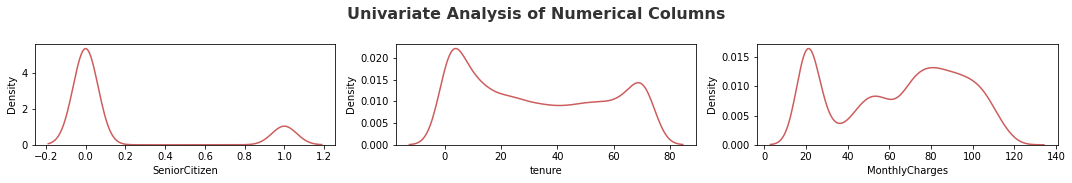

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

Dari hasil visualisasi tersebut dapat disimpulkan bahwa:
- Kolom `tenure` dan `monthlyChargers` memiliki **distribusi binomial**
- Kolom `seniorCitizen` sepertinya memiliki distribusi data **positive skewed** (menceng ke kanan) yang mengindikasikan terdapat outlier.

### Categorical Columns

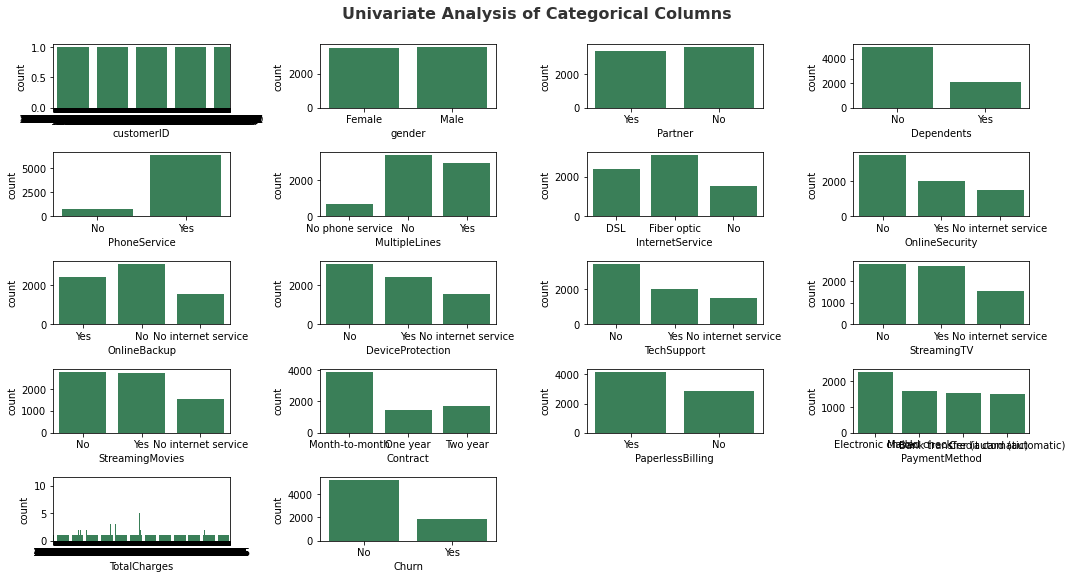

In [ ]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=df[cat_cols[i]], color='seagreen')
    plt.tight_layout()

Dari hasil visualisasi diatas dapat disimpulkan bahwa:
- ....................

## Multivariate Analysis

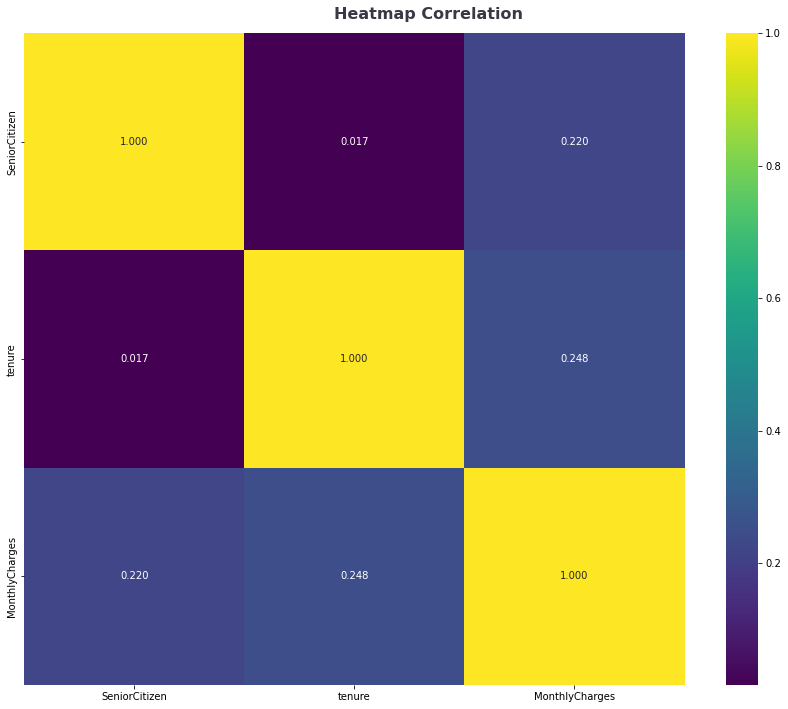

In [ ]:
# Heatmap Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='viridis')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

Dari hasil korelasi tersebut diketahui bahwa:

- Kolom target `Churn` memiliki korelasi negatif lemah pada ............

### Features by Target

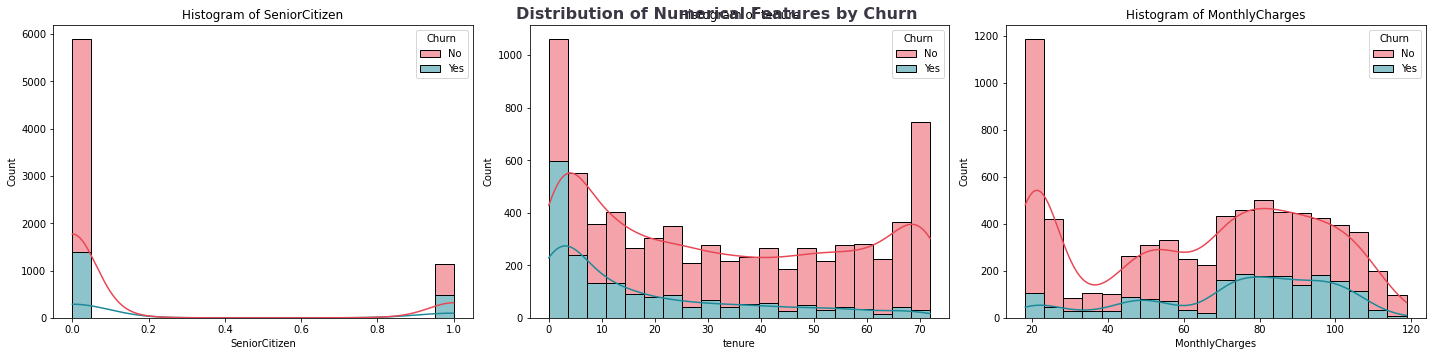

In [ ]:
# EDA Numerical Features by Target
num_cols2 = ['SeniorCitizen','tenure', 'MonthlyCharges']
clr1 = ['#E84855', '#1D8A99']
fig, ax = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Distribution of Numerical Features by Churn', color='#3C3744',
             fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(num_cols2):
    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True,
                 multiple='stack', palette=clr1, ax=ax[i])
    ax[i].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

Dari hasil visualisasi tersebut dapat disimpulkan bahwa:
- Kolom `tenure` dan monthlyChargers memiliki distribusi binomial
- Kolom `seniorCitizen` sepertinya memiliki distribusi data positive skewed (menceng ke kanan) yang mengindikasikan terdapat outlier.


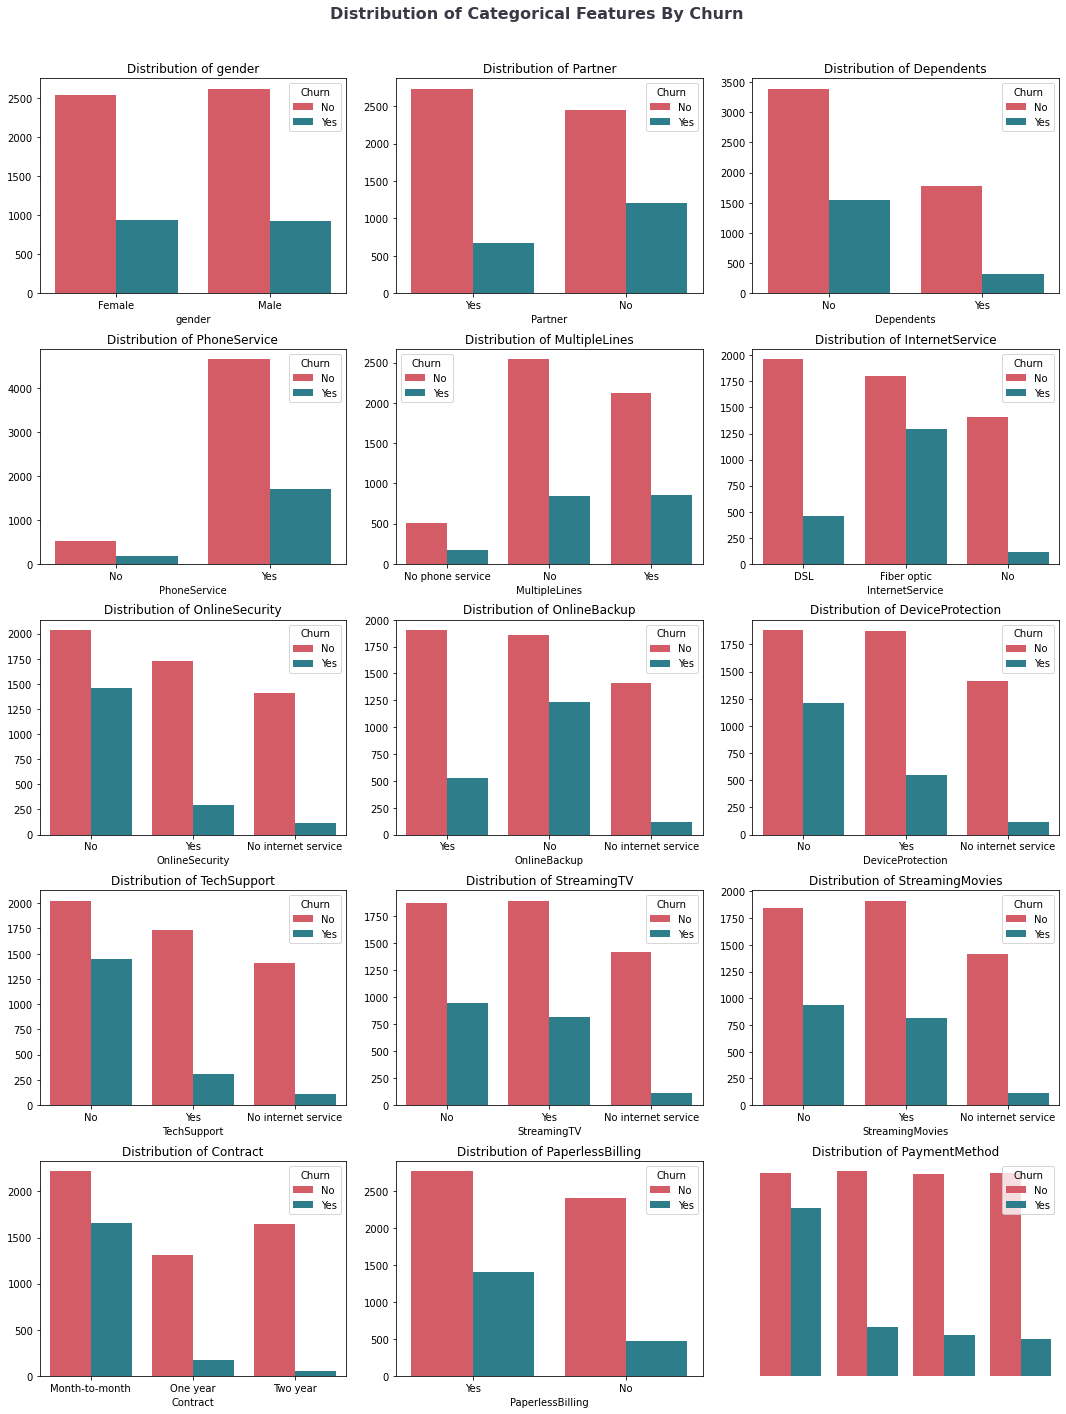

In [ ]:
# EDA Categorical Features by Target
cat_cols2 = ['gender', 'Partner', 'Dependents', 'PhoneService',
             'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
clr2 = ['#E84855', '#1D8A99']
fig, axes = plt.subplots(5, 3, figsize=(15,20))
fig.suptitle('Distribution of Categorical Features By Churn', color='#3C3744',
             fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='Churn', palette=clr2, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)

**Berdasarkan hasil visualiasi tersebut, maka:**

**Categorical Features:**
- `gender` : Male = Female
- `SeniorCitizen` : No SeniorCitizen > SeniorCitizen
- `Partner` : No Partner > Partner
- `Dependents` : No Dependent > Dependent
- `PhoneService` : PhoneService > No PhoneService
- `MultipleLines` : MultipleLines > No MultipleLines > No PhoneService
- `InternetService` : Fiber Optic > DSL > No InternetService
- `OnlineSecurity` : Absent > Present > No InternetService
- `OnlineBackup` : Absent > Present > No InternetService
- `DeviceProtection` : Absent > Present > No InternetService
- `TechSupport` : Absent > Present > No InternetService
- `StreamingTV` : Absent > Present > No InternetService
- `StreamingMovies` : Absent > Present > No InternetService
- `Contract` : Month-to-Month > One year > Two year
- `PaperlessBilling` : Present > Absent
- `PaymentMethod` : Electronic check > Mailed check > Bank Transfer (automatic) > - Credit Card (automatic)

## EDA Conclusion

Berdasarkan EDA yang telah dilakukan, dapat ditarik kesimpulan sebagai berikut:
1. **Dataset overview:**
  Dataset berisi 7.043 baris dan 21 kolom.
Tidak ada missing values dalam dataset.
Terdapat 4 kolom biner, 9 kolom kategorikal, dan 8 kolom numerik pada dataset.
Variabel targetnya adalah "Churn", yang memiliki 2 kelas: "Yes" dan "No".
Proporsi "No" dalam variabel target lebih tinggi daripada "Yes".
2. **Univariate Analysis**
-  **Numerical Columns**:
Kolom "tenure" dan "MonthlyCharges" memiliki distribusi bimodal.
Kolom "SeniorCitizen" memiliki highly skewed distribution.
Sebagian besar kolom numerik tidak memiliki outliers yang ekstrim.
- **b. Categorical Columns**:
Mayoritas pelanggan adalah laki-laki (50,5%) dan tidak memiliki partners (51,7%).
Sebagian besar pelanggan memiliki phone service (90,3%), tetapi hanya sedikit pelanggan yang memiliki multiple lines (42,7%).
Mayoritas pelanggan menggunakan fiber optic (43,96%) dan tidak memiliki online security (49,7%).
Sebagian besar pelanggan membayar menggunakan electronic check (33,6%).
4. **Heatmap Correlation**:
Terdapat korelasi positif yang kuat antara "TotalCharges" dan "tenure".
Terdapat korelasi negatif sedang antara "MonthlyCharges" dan "tenure".
"SeniorCitizen" dan "MonthlyCharges" memiliki korelasi positif yang lemah dengan "Churn".
5. **EDA Numerical Features by Target**:
Pelanggan yang melakukan churning cenderung memiliki "MonthlyCharges" yang lebih tinggi dibandingkan pelanggan yang tidak melakukan churning.
Pelanggan yang melakukan churning cenderung memiliki "tenure" yang lebih pendek dibandingkan dengan pelanggan yang tidak melakukan churning.
"SeniorCitizen" tampaknya tidak memiliki pengaruh yang signifikan terhadap churn.
6. **EDA Categorical Features by Target**:
Pelanggan wanita memiliki tingkat churn yang sedikit lebih tinggi daripada pelanggan pria.
Pelanggan yang tidak memiliki partners atau dependents memiliki tingkat churn yang lebih tinggi.
Pelanggan yang memiliki layanan internet iber optic internet service, online security, online backup, device protection, atau tech support memiliki tingkat churn yang lebih tinggi.
Pelanggan yang memiliki month-to-month contract, paperless billing, atau pay using electronic check memiliki tingkat churn yang lebih tinggi.

# Business Insight

In [ ]:
# copy dataframe
df2 = df.copy()

## 1. Apakah jenis layanan memiliki tingkat churn paling tinggi?

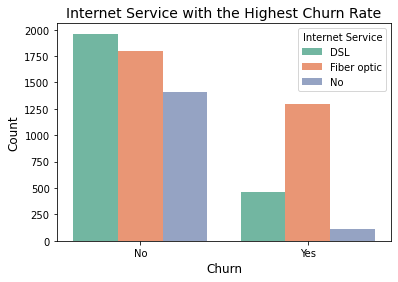

In [ ]:
sns.countplot(data=df2, x='Churn', hue='InternetService', palette='Set2')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Internet Service with the Highest Churn Rate', fontsize=14)
plt.legend(title='Internet Service')
# plt.savefig('fig/insight1.png')

## 2. Apakah durasi kontrak berpengaruh terhadap keputusan pelanggan untuk berhenti langganan?

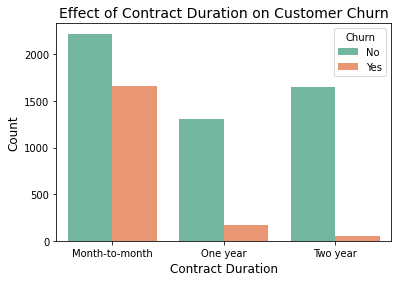

In [ ]:
sns.countplot(data=df2, x='Contract', hue='Churn', palette='Set2')
plt.xlabel('Contract Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Effect of Contract Duration on Customer Churn', fontsize=14)
plt.legend(title='Churn')
# plt.savefig('fig/insight2.png')

## 3. Apakah ada perbedaan dalam tingkat churn antara pelanggan yang menggunakan layanan tambahan seperti tech support, online security, dan backup?

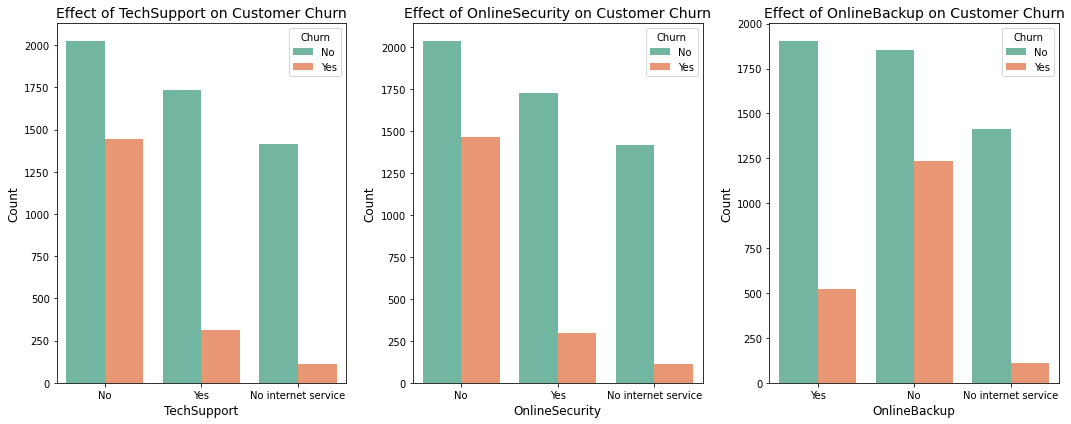

In [ ]:
services = ['TechSupport', 'OnlineSecurity', 'OnlineBackup']
fig, axs = plt.subplots(ncols=3, figsize=(15, 6))
for i, service in enumerate(services):
    sns.countplot(data=df2, x=service, hue='Churn', palette='Set2', ax=axs[i])
    axs[i].set_xlabel(service, fontsize=12)
    axs[i].set_ylabel('Count', fontsize=12)
    axs[i].set_title(f'Effect of {service} on Customer Churn', fontsize=14)
    axs[i].legend(title='Churn')
plt.tight_layout()
# plt.savefig('fig/insight4.png')


Apa faktor yang mempengaruhi keputusan pelanggan beralih layanan?

Strategi apa yang dapat dilakukan untuk mempertahankan customer churn, seperti pelanggan dengan kontrak bulanan atau yang membayar menggunakan electronic check??

Apakah layanan internet fiber optic memiliki masalah kualitas yang menyebabkan tingkat churn yang lebih tinggi?

Apakah layanan online security, online backup, device protection, atau tech support memenuhi kebutuhan pelanggan?

Apakah dependency pelanggan memiliki tingkat churn yang lebih rendah?

# Stage 2 : Data Preprocessing

## Data Cleaning

### Handling Irrelevant Feature

In [ ]:
# copy dataframe for preprocessing
df_prep = df.copy()

In [ ]:
df_prep = df.drop(['customerID', 'gender', 'PhoneService','MultipleLines'], axis=1)

- `Customer_id` dihapus karena tidak memiliki efek pada indikasi churn, - kolom `gender` dihapus karena nilai churn untuk laki-laki dan perempuan hampir sama.
- `PhoneService` dan `Multiple Line` tidak memberikan informasi apa pun tentang churn sehingga keduanya juga dihapus

### Handling Typo Error Data Types

In [ ]:
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')

mengganti tipe data `TotalCharges` ke tipe data numerik

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   InternetService   7043 non-null   object 
 5   OnlineSecurity    7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   DeviceProtection  7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   StreamingTV       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7043 non-null   object 


### Handling Missing Values

In [ ]:
df_prep.TotalCharges.isna().sum()

11

pada column `totaChargers` terdapat 11 missing value

In [ ]:
df_prep.dropna(inplace=True)

menghapus missing value pada kolom `totalChargers`

In [ ]:
# check again if any missing values
print('Apakah masih terdapat kolom dengan nilai null/missing values?', df_prep.isnull().any().any())

Apakah masih terdapat kolom dengan nilai null/missing values? False


### Handling Duplicate Data

In [ ]:
df_prep.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7032, dtype: bool

In [ ]:
# check agaixn if any duplicate
print('Apakah masih terdapat duplicate data ?', df_prep.duplicated().any())

Apakah masih terdapat duplicate data ? True


In [ ]:
df_prep.duplicated().sum()

41

In [ ]:
duplicate_rows = df_prep[df_prep.duplicated()]
duplicate_rows

### Handling Outlier

In [ ]:
from scipy.stats import shapiro

In [ ]:
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# ----------------------------------------------
def outlier_detect_normal(df, col):
    m = df[col].mean()
    s = df[col].std()
    return df[((df[col]-m)/s).abs()>3]

# ----------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# ----------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

def preprocess(df, col):
    print("************************* {} *************************\n".format(col))
    print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
    plt.figure(figsize=(8,5))
    df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
for i in range(len(num_cols)):
    stat,p = shapiro(df[num_cols[i]])
    print(num_cols[i])
    print('P_value=%.3f' % (p))
    print("*******************************")

SeniorCitizen
P_value=0.000
*******************************
tenure
P_value=0.000
*******************************
MonthlyCharges
P_value=0.000
*******************************




```
"Dalam Uji Normalitas Shapiro-Wilk:
H0: Data memiliki distribusi normal

Berdasarkan nilai P yang diperoleh dari uji Shapiro (nilai P < 5%),
kita menolak hipotesis nol (H0) --> Oleh karena itu, variabel numerik tidak mengikuti distribusi normal."
```



************************* SeniorCitizen *************************

lower outlier: 0 ****** upper outlier: 1142



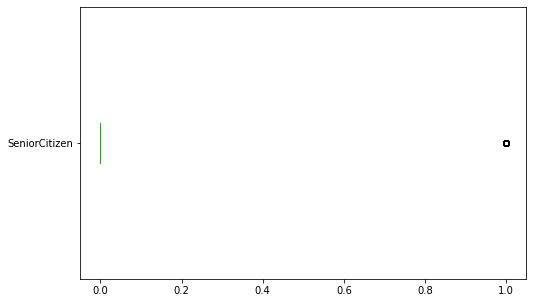

************************* tenure *************************

lower outlier: 0 ****** upper outlier: 0



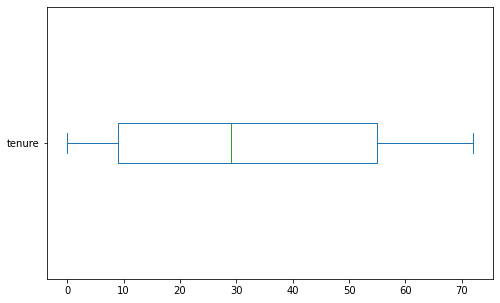

************************* MonthlyCharges *************************

lower outlier: 0 ****** upper outlier: 0



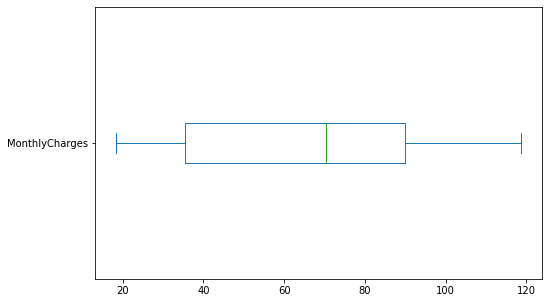

In [ ]:
for i in range(len(num_cols)):
    preprocess(df[num_cols], num_cols[i])

`SeniorCitizen` adalah sebuah kolom biner sehingga 1142 instansi bukanlah data outlier

In [ ]:
df_clean = df_prep.copy()

## Feature Engineering

### Feature Extraction

In [ ]:
# get correlation > +- 0.5
df_corr = df_clean.corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

tenure with TotalCharges has correlation : 0.826
MonthlyCharges with TotalCharges has correlation : 0.651


### Feature Scaling

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

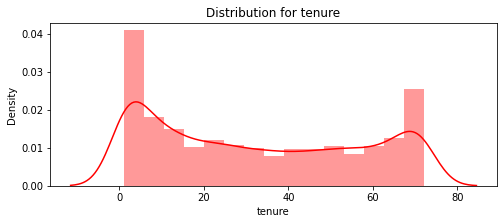

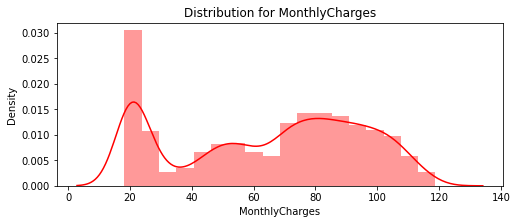

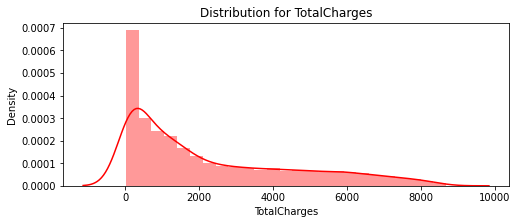

In [ ]:
# distribution of data before scaling
col_num =  ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col_num :distplot(features, df_clean)

Berdasarkan hasil visualiasi tersebut, maka:
- Kolom `tenure` akan dilakukan Standard scaling karena memiliki distribusi right skewd
- Kolom `MonthlyCharges` dan `TotalCharges` akan dilakukan standard scaling untuk memastikan bahwa kedua kelompok memiliki skala yang sama.


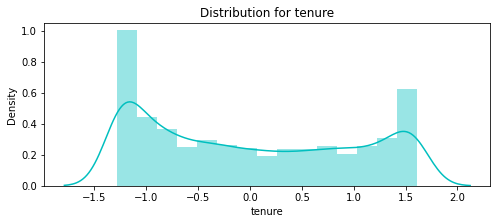

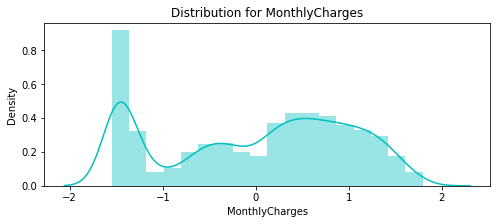

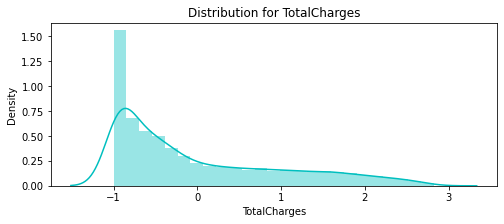

In [ ]:
data_std = pd.DataFrame(StandardScaler().fit_transform(df_clean[col_num]).astype('float64'), columns = col_num)
for feat in col_num: distplot(feat, data_std, color='c')

In [ ]:
# statistics data after transformation
df_clean[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Dari hasil statistik tersebut diketahui bahwa:
- Kolom `Tenure` memiliki nilai min = -1.2 dan nilai max = 1.6
- Kolom `MonthlyChargers` memiliki nilai min = -1.5 dan nilai max = 1.8 dianggap tidak terlalu variatif range datanya.
- Kolom `TotalChargers` ..............

### Feature Encoding

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df_prep = df_clean.apply(lambda x: object_to_int(x))
df_prep.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Feature Selection

In [ ]:
# select features with chi square test
chi2_check = []
check_cols = ['Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
# check_cols = df_prep.corr()['ProdTaken'].iloc[1:].index.tolist()
for i in check_cols:
    if stats.chi2_contingency(pd.crosstab(df_clean['Churn'], df_clean[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[check_cols, chi2_check]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Partner,Reject Null Hypothesis
1,Dependents,Reject Null Hypothesis
2,InternetService,Reject Null Hypothesis
3,OnlineSecurity,Reject Null Hypothesis
4,OnlineBackup,Reject Null Hypothesis
5,DeviceProtection,Reject Null Hypothesis
6,TechSupport,Reject Null Hypothesis
7,StreamingTV,Reject Null Hypothesis
8,StreamingMovies,Reject Null Hypothesis
9,Contract,Reject Null Hypothesis


In [ ]:
chi2_result = result[result['Hypothesis Result']=='Reject Null Hypothesis']['Column'].values.tolist()
features_cols = []
fix_cols = features_cols
for col in chi2_result:
    if col not in features_cols:
        fix_cols.append(col)
fix_cols

['Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
df_clean_model = df_clean.copy()


# Stage 3 : Machine Learning Modelling & Evaluation

##Imbalance Data

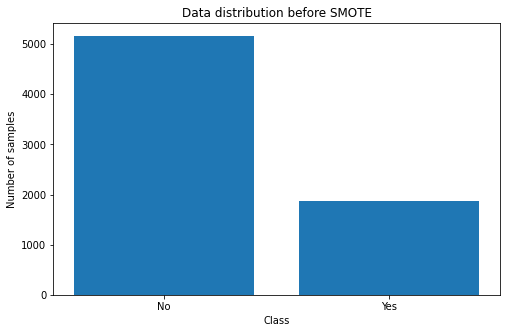

In [ ]:
# Data sebelum SMOTE
plt.figure(figsize=(8, 5))
plt.bar(Counter(y).keys(), Counter(y).values())
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Data distribution before SMOTE')
plt.show()

In [ ]:
over = SMOTE(sampling_strategy = 1)

X = df_clean_model.drop('Churn', axis=1)
y = df_clean_model['Churn']

X, y = over.fit_resample(X, y)

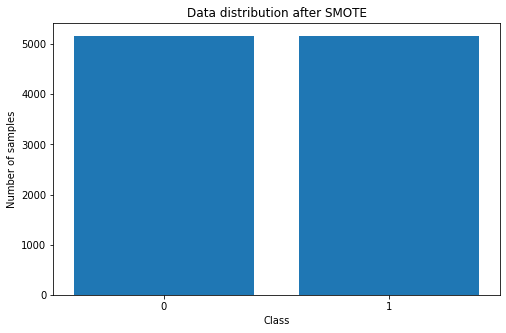

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(Counter(y).keys(), Counter(y).values())
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Data distribution after SMOTE')
plt.show()

## Split Train & Test Set

In [ ]:
# splitting into data train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Jumlah data latih  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

print(f'Jumlah data uji terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_test==0)}')
print(f'Jumlah class 1 : {sum(y_test==1)}\n')

Jumlah data latih  terdiri dari 8260 baris
Jumlah class 0 : 4126
Jumlah class 1 : 4134

Jumlah data uji terdiri dari 2066 baris
Jumlah class 0 : 1037
Jumlah class 1 : 1029



In [ ]:
df_clean_model.to_csv('telco_preprocessing.csv', index=False)

# Data Modelling #1

## Model Selection

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int64  
 2   Dependents        7032 non-null   int64  
 3   tenure            7032 non-null   int64  
 4   InternetService   7032 non-null   int64  
 5   OnlineSecurity    7032 non-null   int64  
 6   OnlineBackup      7032 non-null   int64  
 7   DeviceProtection  7032 non-null   int64  
 8   TechSupport       7032 non-null   int64  
 9   StreamingTV       7032 non-null   int64  
 10  StreamingMovies   7032 non-null   int64  
 11  Contract          7032 non-null   int64  
 12  PaperlessBilling  7032 non-null   int64  
 13  PaymentMethod     7032 non-null   int64  
 14  MonthlyCharges    7032 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   int64  


In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(X_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### 1. Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1037
           1       0.77      0.81      0.79      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



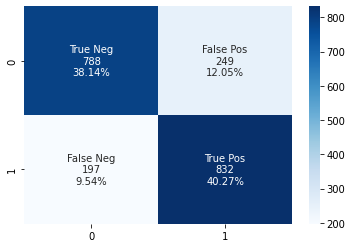

In [ ]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

model_evaluation(model_lr,X_test,y_test)

In [ ]:
model(model_lr,X_train,y_train,X_test,y_test)

Cross Validation Score :  87.37%


### 2. AdaBoost

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1037
           1       0.80      0.85      0.82      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



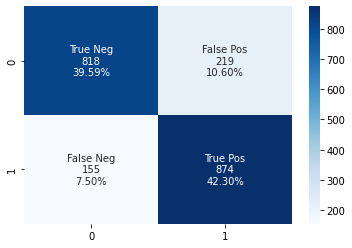

In [ ]:
model_adb = AdaBoostClassifier(random_state=42)
model_adb.fit(X_train, y_train)

model_evaluation(model_adb,X_test,y_test)

In [ ]:
model(model_lr,X_train,y_train,X_test,y_test)

Cross Validation Score :  87.37%


### 3. XGBoost

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1037
           1       0.84      0.85      0.85      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



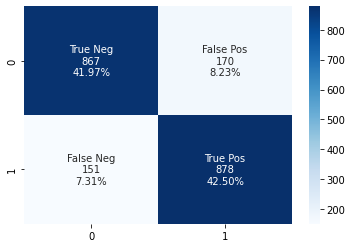

In [ ]:
model_xgb = XGBClassifier(verbosity=0, random_state=42)
model_xgb.fit(X_train, y_train)

model_evaluation(model_xgb,X_test,y_test)

In [ ]:
model(model_xgb,X_train,y_train,X_test,y_test)

Cross Validation Score :  92.45%


## Model Evaluation

Tujuannya adalah untukn memprediksi apakah pelanggan akan churn apa tidak, maka:
- Metric evaluasi yang akan kita fokuskan adalah F1 Score dimana kita ingin mempertimbangkan Precision dan Recall.
- Karena data target pada kasus kita terjadi imbalance class sehingga kita juga akan mempertimbangkan nilai AUC sebagai pembeda antar kelas negative dan positive.
- Cross Validation Score  digunakan untuk mengevaluasi kinerja model machine learning, khususnya mendeteksi saat terjadinya data leakage.



In [ ]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)

    return accuracy, precision, recall, f1, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)', 'Cross Validation Score']

    eval_list = []
    for name, model in zip(model_name, model_list):
        acc, prec, rec, f1, auc_test, auc_train = eval_classification(model, X_train, y_train, X_test, y_test)
        cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc'))
        eval_list.append([name, acc, prec, rec, f1, auc_test, auc_train, cv_score])
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)

    return df_model


In [ ]:
# scoring base model
model_list_base = [model_lr, model_adb, model_xgb]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train),Cross Validation Score
0,Logistic Regression,0.7841,0.7697,0.8086,0.7886,0.8660,0.8776,0.873000
1,AdaBoost,0.8190,0.7996,0.8494,0.8238,0.8986,0.9084,0.903227
2,XGBoost,0.8446,0.8378,0.8533,0.8455,0.9250,0.9893,0.925448


Dari hasil evaluasi ketiga model tersebut didapatkan bahwa:
- **Model Logistic Regression** mampu menghasilkan F1 Score cukup tinggi yaitu 80% dimana nilai Precision yang lebih tinggi dari nilai recall
- **Model AdaBoost** mampu menghasilkan F1 Score 83% dimana nilai Precision yang lebih tinggidaripada Recall
- **Model XGBoost** mampu menghasilkan F1 Score yang tinggi yaitu 84%.Precision dan Recall hampir sama.

Maka dapat disimpulkan dari kelima model yang dipilih, **Model XGBoost** merupakan base model terbaik dengan F1 Score paling tinggi yaitu 85% dan hasil scoring metric yang lain juga lebih unggul.

## Hyperparameter Tuning

####Random Search

In [ ]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])

##### Logistic Regression

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1037
           1       0.77      0.80      0.78      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



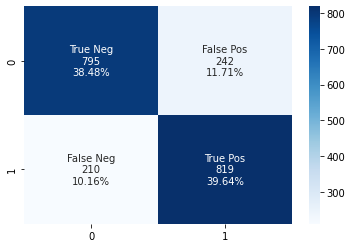

In [ ]:
model_lr = LogisticRegression(random_state=42)
tuned_lr = RandomizedSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='f1', random_state=42)
tuned_lr.fit(X_train, y_train)

model_evaluation(tuned_lr, X_test, y_test)

In [ ]:
print('MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING')
print('=====================================================')
show_best_hyperparameter(tuned_lr, list_hyperparameters[0])
print('=====================================================')

MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING
Best penalty: l2
Best C: 6.158482110660261


In [ ]:
model(tuned_lr,X_train,y_train,X_test,y_test)

Cross Validation Score :  87.40%


##### AdaBoost

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1037
           1       0.79      0.87      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



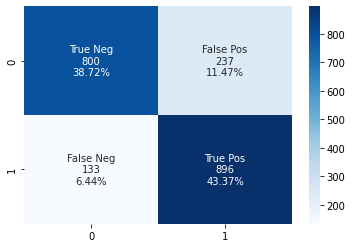

In [ ]:
model_adb = AdaBoostClassifier(random_state=42)
tuned_adb = RandomizedSearchCV(model_adb, list_hyperparameters[1], cv=5, scoring='f1', random_state=42)
tuned_adb.fit(X_train, y_train)

model_evaluation(tuned_adb, X_test, y_test)

In [ ]:
print('MODEL AdaBoost AFTER HYPERPARAMETER TUNING')
print('=====================================================')
show_best_hyperparameter(tuned_adb, list_hyperparameters[1])
print('=====================================================')

MODEL AdaBoost AFTER HYPERPARAMETER TUNING
Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R


In [ ]:
model(tuned_adb,X_train,y_train,X_test,y_test)

Cross Validation Score :  90.58%


##### XGBClassifier

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1037
           1       0.83      0.85      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



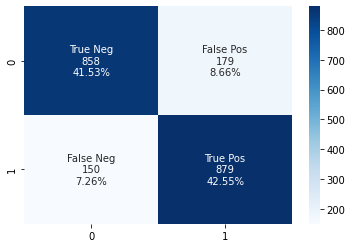

In [ ]:
model_xgb = XGBClassifier(random_state=42, verbosity=0)
tuned_xgb = RandomizedSearchCV(model_xgb, list_hyperparameters[-1], cv=5, scoring='f1', random_state=42)
tuned_xgb.fit(X_train, y_train)

model_evaluation(tuned_xgb, X_test, y_test)

In [ ]:
print('MODEL XGBOOST AFTER HYPERPARAMETER TUNING')
print('=========================================')
show_best_hyperparameter(tuned_xgb, list_hyperparameters[-1])
print('=========================================')

MODEL XGBOOST AFTER HYPERPARAMETER TUNING
Best max_depth: 10
Best min_child_weight: 8
Best gamma: 0.1
Best tree_method: auto
Best colsample_bytree: 0.7000000000000001
Best learning_rate: 0.13131313131313133
Best reg_lambda: 0.5
Best reg_alpha: 0.6000000000000001


In [ ]:
model(tuned_xgb,X_train,y_train,X_test,y_test)

Cross Validation Score :  92.32%


##### Comparation

In [ ]:
# base model
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train),Cross Validation Score
0,Logistic Regression,0.7841,0.7697,0.8086,0.7886,0.8660,0.8776,0.873000
1,AdaBoost,0.8190,0.7996,0.8494,0.8238,0.8986,0.9084,0.903227
2,XGBoost,0.8446,0.8378,0.8533,0.8455,0.9250,0.9893,0.925448


In [ ]:
# tuned model
model_list_tuned = [tuned_lr, tuned_adb, tuned_xgb]
score_all_classification(model_list_tuned, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train),Cross Validation Score
0,Logistic Regression,0.7812,0.7719,0.7959,0.7837,0.8629,0.8756,0.874256
1,AdaBoost,0.8209,0.7908,0.8707,0.8289,0.9003,0.9102,0.905594
2,XGBoost,0.8408,0.8308,0.8542,0.8424,0.9252,0.9769,0.921154


# Modelling Conclusion

Model yang memberikan hasil terbaik yaitu model **XGBoost dengan F1 Score 84%** dimana telah dilakukan hyperparameter tuning dengan mempertimbangkan nilai metric yang lain dan **Cross Validation Score 92.32%**. Model ini nantinya akan digunakan untuk menganalisis fitur-fitur yang lebih mendominasi untuk dijadikan insight dan hasil prediksi model akan digunakan sebagai acuan bisnis kami.

# Stage 4 Insights and Recommendation

# Modelling Insights

In [ ]:
# feature importance using best model
feature_importance_xgb = pd.Series(tuned_xgb2.best_estimator_.feature_importances_, index=X[selected_cols].columns)
df_feature = feature_importance_xgb.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, y='index', x='Score', palette='YlOrRd_r', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance XGBoost (Best Model)', fontsize=14)
plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
# predict labels train and test data
best_model = tuned_xgb.best_estimator_
pred_test = best_model.predict(X_test)
pred_train = best_model.predict(X_train)
df_pred_test = pd.DataFrame({'Churn':y_test, 'Churn_pred':pred_test}, index=y_test.index.copy())
df_pred_train = pd.DataFrame({'Churn':y_train, 'Churn_pred':pred_train}, index=y_train.index.copy())

# combine prediction labels into features column on clean data
df_test = df_prep[df_prep.index.isin(df_pred_test.index)]
df_train = df_prep[df_prep.index.isin(df_pred_train.index)]
df_final_test = pd.concat([df_test.drop('Churn', axis=1), df_pred_test], axis=1)
df_final_train = pd.concat([df_train.drop('Churn', axis=1), df_pred_train], axis=1)
df_final_all = df_final_train.append(df_final_test).reset_index()
df_final_all.head()

# Recomendation

terdapat beberapa rekomendasi yang dapat diberikan untuk meningkatkan penghasilan dan mengurangi customer churn.

1. Perusahaan perlu memfokuskan layanan pada tiga jenis pelanggan, yaitu senior citizen, pelanggan yang tinggal dengan pasangan(partner), dan pelanggan yang tinggal sendirian. Senior citizen rela membayar harga yang lebih tinggi untuk layanan yang berkualitas, sedangkan pelanggan yang tinggal dengan pasangan dan sendirian lebih memilih layanan dengan biaya bulanan di bawah 65.
2. perusahaan perlu fokus pada layanan seperti OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport selama enam bulan pertama karena ini adalah periode yang paling kritis dan tidak pasti bagi pelanggan.
4. Perusahaan perlu membuat layanan StreamingTV dan StreamingMovies terjangkau dan memperhatikan konten yang menarik untuk semua jenis pelanggan.
5. Perusahaan juga perlu memperhatikan metode pembayaran yang mudah dan lancar, seperti Bank Transfer (automatic) dan Credit Card (automatic). Perusahaan harus menghindari Electronic check karena memiliki tingkat churn yang tinggi.

Rekomendasi di atas dapat membantu Telco Company untuk meningkatkan penghasilan dan mengurangi churn. Penting bagi perusahaan untuk selalu melakukan evaluasi dan perbaikan berkelanjutan untuk memastikan kualitas layanan yang diberikan selalu terjaga.

# Conclution

Berdasarkan hasil prediksi dan analisis yang telah kami lakukan maka dapat disimpulkan bahwa:

1. **Model yang direkomendasikan adalah XGBoost memiliki F1 Score sebesar 82.39%** artinya dapat memprediksi pelanggan yang akan melakukan churn (Precision) 88.51% dengan ketepatan memprediksi pelanggan benar akan churn (Recall) sebanyak 77.06%.